<h1> Data Augmentation To Address Overfitting In Flower Classification CNN</h1>

In this notebook I will build a CNN to classify flower images. I will also see how my model overfits and how overfitting can be addressed using data augmentation.

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import PIL


%matplotlib inline

<b> Load flowers dataset : </b>

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir =  tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir to indicates where to download data. I specified .
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/9011235009_58c7b244c1_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14845607659_1be18c5d7f.jpg'),
 PosixPath('datasets/flower_photos/dandelion/19602790836_912d38aaa8.jpg'),
 PosixPath('datasets/flower_photos/dandelion/19064700925_b93d474e37.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14065420729_9b388bf7cb_m.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/21347496068_f4d3339607.jpg'),
 PosixPath('datasets/flower_photos/roses/7187035716_5d0fb95c31_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8775267816_726ddc6d92_n.jpg'),
 PosixPath('datasets/flower_photos/roses/272481307_1eb47ba3e0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4093390305_4010c736c9.jpg')]

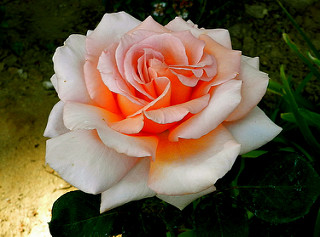

In [9]:
PIL.Image.open(roses[1])

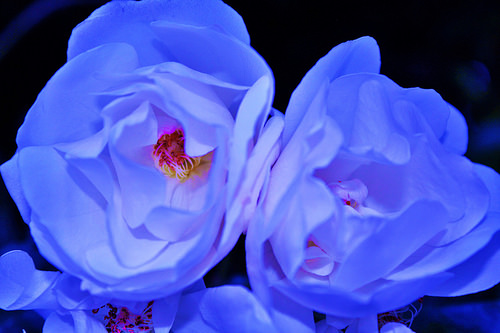

In [10]:
PIL.Image.open(roses[0])

In [11]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/2425067141_b27043a800_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/2481827798_6087d71134.jpg'),
 PosixPath('datasets/flower_photos/tulips/12916135413_dafcf3089e_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/11746548_26b3256922_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2402342888_dd65677013.jpg')]

## <b>Read flowers images from disk into numpy array using opencv
</b>

In [12]:
flowers_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunfowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [13]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [14]:
flowers_image_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/21347496068_f4d3339607.jpg'),
 PosixPath('datasets/flower_photos/roses/7187035716_5d0fb95c31_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8775267816_726ddc6d92_n.jpg'),
 PosixPath('datasets/flower_photos/roses/272481307_1eb47ba3e0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4093390305_4010c736c9.jpg')]

In [15]:
str(flowers_image_dict['roses'][0])

'datasets/flower_photos/roses/21347496068_f4d3339607.jpg'

In [16]:
img = cv2.imread(flowers_image_dict['roses'][0])

In [17]:
img.shape

(333, 500, 3)

the images has different shape => we have to resize them

In [18]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [19]:
X, y = [], []

for flower_name, images in flowers_image_dict.items() :
  for image in images :
    img = cv2.imread(str(image))
    resized_image = cv2.resize(img, (180, 180))
    X.append(resized_image)
    y.append(flowers_labels_dict[flower_name])

In [20]:
X = np.array(X)
y = np.array(y)

## <b> Train Test Split </b>

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 0)

## <b>Preprocessing : Scale the images </b>

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## <b>Build Convolutional Neural Network (CNN) and train it

In [23]:
model = keras.Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'), # 16 : filter numers, 3 : filter (kernel) size 3x3
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(5)
])

model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.3455 - loss: 1.4381
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 124s 928ms/step - accuracy: 0.6134 - loss: 0.9105
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 83s 946ms/step - accuracy: 0.7007 - loss: 0.7677
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 81s 935ms/step - accuracy: 0.7999 - loss: 0.5406
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 944ms/step - accuracy: 0.8703 - loss: 0.3737
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 79s 906ms/step - accuracy: 0.9394 - loss: 0.2059
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 83s 918ms/step - accuracy: 0.9332 - loss: 0.2171
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 64s 913ms/step - accuracy: 0.9813 - loss: 0.0793
Epoch 9/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 67s 953ms/step - accuracy: 0.9901 - loss: 0.0418
Epoch 10/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 81s 946ms/step - accuracy: 0.9868 - loss: 0.0673
Epoch 11/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 953ms/step - accuracy: 0.9922 - loss: 0.0306
Epoch 12/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 81s 

In [24]:
model.evaluate(X_test_scaled, y_test )

24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - accuracy: 0.6353 - loss: 2.9018


[2.807399272918701, 0.6460295915603638]

 The train accuracy is very high (100%), and the test accuracy is significantly low (64.60%) ==> overfitting.

In [25]:
predictions = model.predict(X_test_scaled)
predictions

24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 280ms/step


array([[-10.852516 ,   3.1308906,  14.836585 , -30.957129 ,  -0.9367071],
       [  4.709526 ,   9.969496 ,   9.60336  , -33.558964 ,  -9.973088 ],
       [ 24.015587 ,  -2.085883 ,  -4.8529773, -38.090336 ,  20.60954  ],
       ...,
       [ -8.429486 ,  -3.8033729,  22.300468 , -36.60216  ,  -1.657314 ],
       [ 10.790823 ,   2.0110953,   1.6789389, -28.746067 ,   8.581639 ],
       [ 23.104671 ,  -1.41847  ,  -9.885743 , -56.924965 ,  43.178665 ]],
      dtype=float32)

In [26]:
score = tf.nn.softmax(predictions[0])
# score values are between 0 and 1

In [27]:
classe = np.argmax(score)
classe # return the index of the max value of score

2

## <b> Improve Test Accuracy Using Data Augmentation </b>

In [28]:
# Flip + Rotation + Zoom
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Original Image

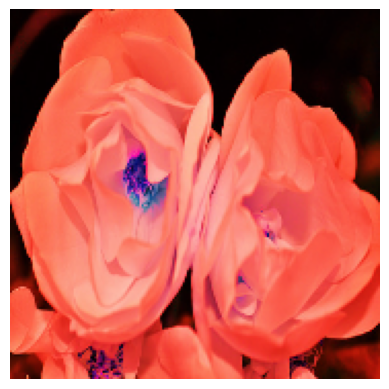

In [29]:
plt.axis('off')
plt.imshow(X[0])

#### Newly generated training sample using data augmentation

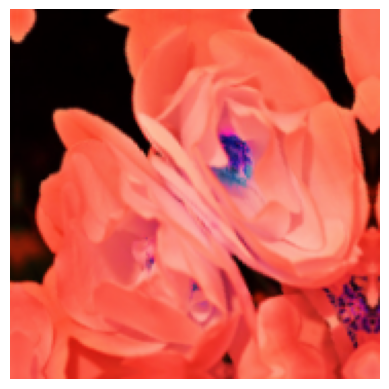

In [30]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

## <b> Train the model using data augmentation and drop out layer</b>

In [31]:
model = keras.Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'), # 16 : filter numers, 3 : filter (kernel) size 3x3
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(5)
])

model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.3086 - loss: 1.5444
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5028 - loss: 1.1290
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6543 - loss: 0.8983
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6684 - loss: 0.8197
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6915 - loss: 0.7817
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.7021 - loss: 0.7352
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7168 - loss: 0.7135
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7186 - loss: 0.7018
Epoch 9/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7378 - loss: 0.6555
Epoch 10/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7576 - loss: 0.6332
Epoch 11/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.7499 - loss: 0.6386
Epoch 12/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7570 - lo

In [32]:
model.evaluate(X_test_scaled, y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.7460 - loss: 0.8579


[0.8107690811157227, 0.7590848207473755]

In [33]:
model.predict(X_test_scaled)

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step


array([[  1.2936974 ,  -0.14467436,   7.390661  , -22.11912   ,
          1.1106313 ],
       [  2.0869143 ,   2.9584045 ,   0.88126963,  -7.9057174 ,
          1.4680794 ],
       [  9.371877  ,  -1.3399299 ,  -4.893152  , -18.062931  ,
          7.220466  ],
       ...,
       [  1.0131147 ,   2.1909156 ,   4.053853  ,  -8.048517  ,
          0.77353674],
       [  7.1022296 ,   4.5293736 ,  -3.4733539 , -11.724154  ,
          3.2261481 ],
       [  5.7863045 ,  -0.805027  ,  -8.237906  , -24.721344  ,
         14.799705  ]], dtype=float32)

By using data augmentation and drop out layer the accuracy of test set predictions is increased to 74.60%